In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy


In [2]:
heart_rate = pd.read_csv("/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")
heart_rate.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
import plotly.express as px
fig = px.pie(heart_rate, names='DEATH_EVENT', title='Death Events',width=750, height=400)
fig.show()

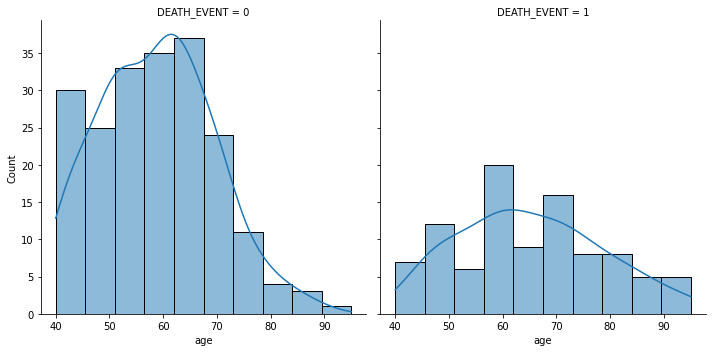

In [4]:
sns.displot(data = heart_rate, x = "age",col = "DEATH_EVENT", kde = True)

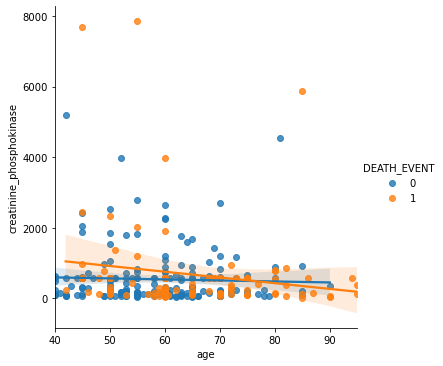

In [5]:
 sns.lmplot(y='creatinine_phosphokinase', x='age', data=heart_rate, hue='DEATH_EVENT')

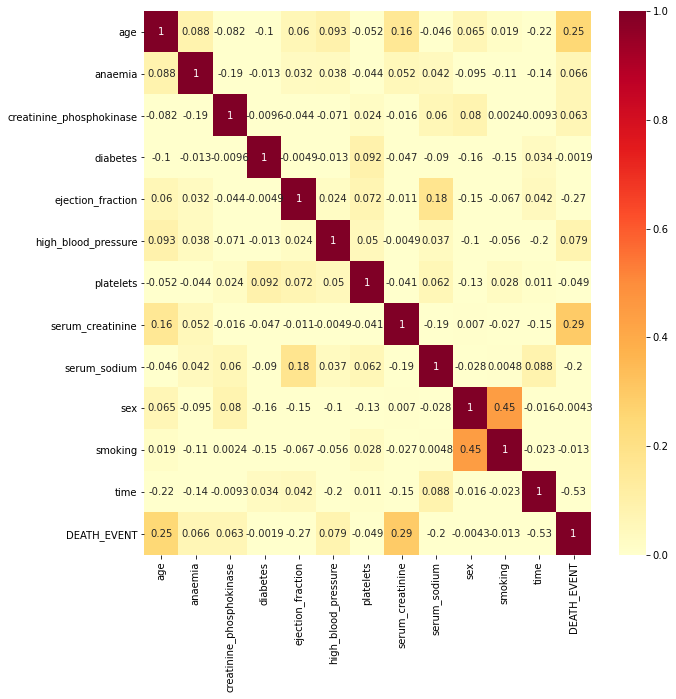

In [6]:
f, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(heart_rate.corr(), annot = True,cmap = "YlOrRd",vmin = 0,vmax = 1)

In [7]:
from sklearn.model_selection import train_test_split

feats = ["age","ejection_fraction","serum_creatinine","serum_sodium","time"]
inputdf = heart_rate[feats]
labels = heart_rate.DEATH_EVENT

x_train, x_test, y_train, y_test = train_test_split(inputdf, labels, test_size=0.2, random_state=1)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import svm

lr = LogisticRegression(random_state = 0,solver = 'liblinear')
lr.fit(x_train, y_train)
print("Accuracy of Logistic Regression model: {:.2f}% \n".format(100*lr.score(x_test,y_test)))


regr = RandomForestRegressor(n_estimators=1000, random_state=0)
regr.fit(x_train, y_train)
print("Accuracy of Random Forest Regressor model: {:.2f}% \n".format(100*regr.score(x_test,y_test)))



clf = DecisionTreeClassifier(max_depth = None, max_leaf_nodes = 25, random_state=0, criterion='entropy')
clf = clf.fit(x_train,y_train)
print("Accuracy of Decision Tree Classifier model: {:.2f}% \n".format(100*clf.score(x_test,y_test)))



sv = svm.SVC(kernel='linear',degree=10)
sv.fit(x_train, y_train)
print("Accuracy of Support-vector machine model: {:.2f}% \n".format(100*sv.score(x_test,y_test)))



neighbor = KNeighborsClassifier(n_neighbors=25)
neighbor.fit(x_train, y_train)
print("Accuracy of KNN model: {:.2f}% \n".format(100*neighbor.score(x_test,y_test)))



Accuracy of Logistic Regression model: 88.33% 

Accuracy of Random Forest Regressor model: 50.85% 

Accuracy of Decision Tree Classifier model: 93.33% 

Accuracy of Support-vector machine model: 90.00% 

Accuracy of KNN model: 90.00% 



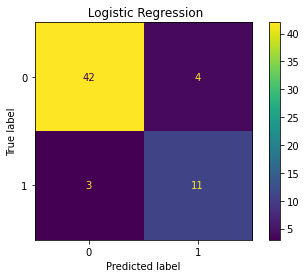

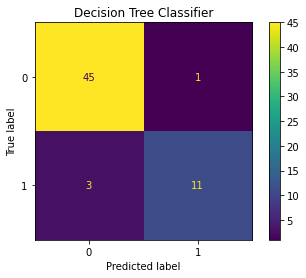

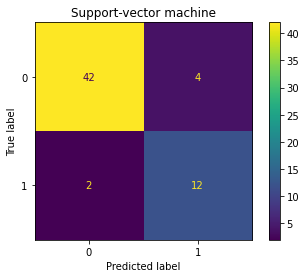

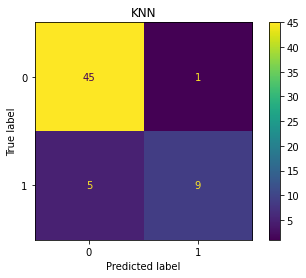

In [9]:
from sklearn.metrics import plot_confusion_matrix

lr = LogisticRegression(random_state = 0,solver = 'liblinear')
lr.fit(x_train, y_train)
plot_confusion_matrix(lr, x_test, y_test)
plt.title(" Logistic Regression")
plt.show()


dtf = DecisionTreeClassifier(max_depth = None, max_leaf_nodes = 25, random_state=0, criterion='entropy')
dtf = dtf.fit(x_train,y_train)
plot_confusion_matrix(dtf, x_test, y_test)
plt.title("Decision Tree Classifier")
plt.show()


svm = svm.SVC(kernel='linear',degree=10)
svm.fit(x_train, y_train)
plot_confusion_matrix(svm, x_test, y_test)
plt.title("Support-vector machine")
plt.show()


neighbor = KNeighborsClassifier(n_neighbors=25)
neighbor.fit(x_train, y_train)
plot_confusion_matrix(neighbor, x_test, y_test)
plt.title("KNN")
plt.show()  